# ACP

### 4DS1

une agence de conseil financier collabore avec un ensemble d'entreprises, dans le but de leurs offrir des analyses rapides pour leurs études annuelles.

En effet, chaque fin d’année, elle collecte toutes les informations concernant les états financiers des entreprises afin de préparer pour chacune un bilan détaillé et concis, et ce en se basant sur les indicateurs suivants :
FD : flux de trésorerie / dette totale,
RA : résultat net / actif,
AD : actif à court terme / dette à court terme,
AV : actif à court terme / ventes.
Le directeur financier vous a fourni le fichier entreprise.txt présentant les différentes valeurs des indicateurs cités ci-dessus de 46 entreprises et il vous demande de préparer un rapport
qui doit contenir une étude statistique sur chaque type d’entreprises, argumentée par une analyse plus convaincante, aboutissants à détecter les indicateurs les plus pertinents sur la santé financière de chaque entreprise.

In [ ]:
#Importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Chargement des données
data = pd.read_csv('entreprises.txt', sep="\t", header=0,index_col=0)#.drop('Ent',axis=1)

n = data.shape[0]
p = data.shape[1]

data

,FD,RA,AD,AV,ET
Ent,,,,,
1,-0.45,-0.41,1.09,0.45,F
2,-0.56,-0.31,1.51,0.16,F
3,0.06,0.02,1.01,0.40,F
4,-0.07,-0.09,1.45,0.26,F
5,-0.10,-0.09,1.45,0.26,F
6,-0.14,-0.07,0.71,0.28,F
7,0.04,0.01,1.50,0.71,F
8,-0.07,-0.06,1.37,0.40,F
9,0.07,-0.01,1.37,0.40,F


In [ ]:
# Exploration des données
#Analyse statistique et visualisations
data.columns

data.shape

data.head()
data.tail(3)

data.info()
data.dtypes

data.describe()

data.isnull()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 5 columns):
FD    46 non-null float64
RA    46 non-null float64
AD    46 non-null float64
AV    46 non-null float64
ET    46 non-null object
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


FD    0
RA    0
AD    0
AV    0
ET    0
dtype: int64

# Application de l'ACP

   Val.Propre    Seuils
0    2.144213  2.083333
1    1.038055  1.083333
2    0.673136  0.583333
3    0.144597  0.250000
meilleur dims =  2


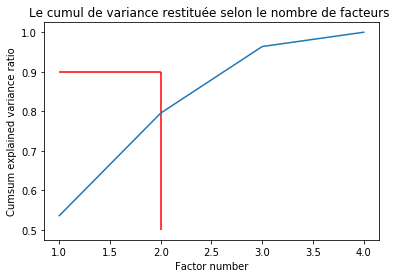

In [ ]:
# Nombre d'axes à retenir
#1-Transformation des données : pas de var discrete
#X = pd.get_dummies(data, prefix_sep='_', drop_first=True)
#print(X)
X = data.loc[:, 'FD':'AV']
p = X.shape[1]

#2-standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Z = sc.fit_transform(X)
#print(Z.shape,Z)

#3-ACP
from sklearn.decomposition import PCA

acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
variances = acp.explained_variance_ratio_#Proportions de variance expliquée : aii
eigval = acp.singular_values_**2/n#la variance expliquée

#4-nb d'axes à retenir : critère de keizer
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]#inverser le tableau
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))#Afficher conjointement les valeurs propres et les seuils
#on va retenir K* = 2 : nb Val.Propre > 1
meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)
print("meilleur dims = ",meilleur_dims)

#La variance expliquée cumulée + K*
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Le cumul de variance restituée selon le nombre de facteurs ")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.hlines(0.90, 1, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0.5, 0.90, colors='r')
plt.show()

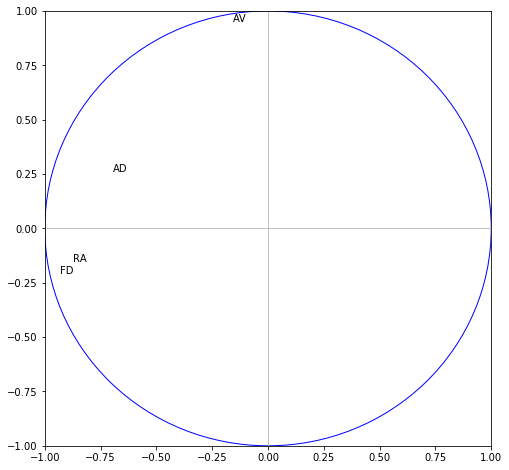

   id    COS2_1    COS2_2    COS2_3
0  FD  0.870616  0.044185  0.006964
1  RA  0.766421  0.023627  0.153251
2  AD  0.481899  0.066932  0.443706
3  AV  0.025277  0.903311  0.069216
   id     CTR_1     CTR_2     CTR_3
0  FD  0.406031  0.042565  0.010345
1  RA  0.357437  0.022761  0.227667
2  AD  0.224744  0.064478  0.659162
3  AV  0.011788  0.870196  0.102825


In [ ]:
#Etude des variables
#1-cercle de corrélation
sqrt_eigval = np.sqrt(eigval)#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#2-critère de qualité des variables avec cos²(X) : La qualité de représentation des variables par rapport aux axes
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]}))

#3-Contribution des variables aux axes (innertie)
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les 3 premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2]}))

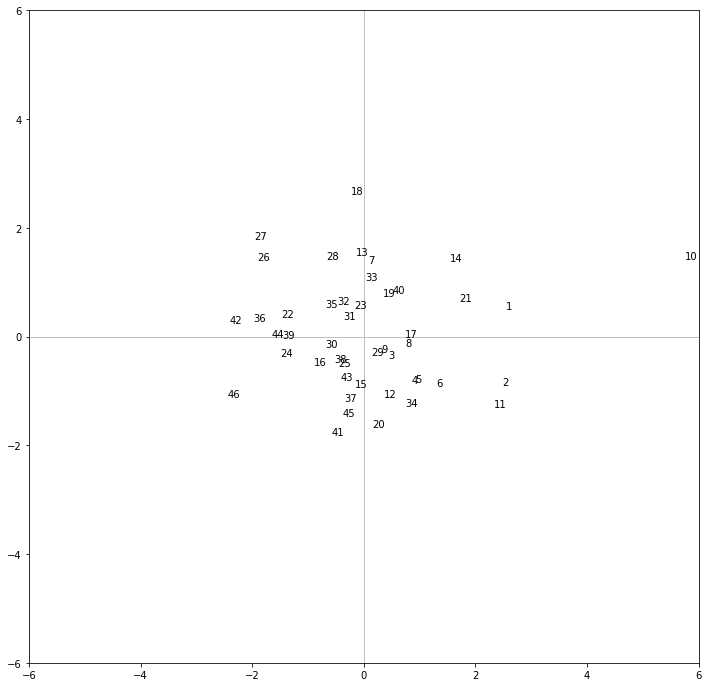

    ID        d_i
0    1   6.780246
1    2   8.232789
2    3   1.096607
3    4   1.490888
4    5   1.588340
5    6   2.922888
6    7   2.835580
7    8   0.707361
8    9   0.459017
9   10  40.434432
10  11   7.288792
11  12   1.487552
12  13   2.413920
13  14   4.611879
14  15   0.903956
15  16   1.270334
16  17   0.595901
17  18   8.718785
18  19   1.602261
19  20   3.135727
20  21   3.361831
21  22   2.828358
22  23   0.374195
23  24   2.984219
24  25   0.546665
25  26   6.983612
26  27   8.726231
27  28   2.534758
28  29   0.288304
29  30   0.522300
30  31   0.580580
31  32   0.655897
32  33   1.283144
33  34   3.363568
34  35   0.815010
35  36   8.225748
36  37   1.793806
37  38   0.686940
38  39   2.711455
39  40   2.801408
40  41   4.371752
41  42   7.862012
42  43   0.824608
43  44   2.896742
44  45   2.828228
45  46  14.571370
    id    COS2_1    COS2_2    COS2_3
0    1  0.955626  0.037452  0.005508
1    2  0.745834  0.095710  0.093071
2    3  0.169669  0.146267  0.678388
3    4

In [ ]:
#Etude des individus

#1-représentation graphique des individus
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n): plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

#2-contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

#3-qualité de representation des individus avec cos²(X)
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]}))

#4-Contribution des individus aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}))